<font size = '+5' color = 'red'><b> PUBG Hacker Detection </b></font>
<font size = '+1' color = 'blue'><b> Inspired from SulmanK </b></font>

![](https://www.cerillion.com/cerillioncom/media/cerillionMedia/BlogImages/PUBG-Mobile.png?ext=.png?width=350)

<font size = '+5' color = 'blue'><b> Introduction </b></font>

* We have PUBG player's data with around 150+ features and 80k+ rows of data. We will use KMeans algo to classify that given player is hacker or not.

* In this notebook we will use only KMeans algo to find Clusters

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

<font size = '+5' color = 'blue'><b>Exploritory Data Analysis </b></font>

* We will examine solo players because it is observed that most of the solo players uses cheats and hacks.

<font size = '+2' color = 'Green'><b>Reading Data </b></font>

In [2]:
df = pd.read_csv('../input/pubg-statisctic/PUBG.csv')

# Remove the '#'to view the data from '#df.head()'

df.head()

,player_name,tracker_id,solo_KillDeathRatio,solo_WinRatio,solo_TimeSurvived,solo_RoundsPlayed,solo_Wins,solo_WinTop10Ratio,solo_Top10s,solo_Top10Ratio,...,squad_RideDistance,squad_MoveDistance,squad_AvgWalkDistance,squad_AvgRideDistance,squad_LongestKill,squad_Heals,squad_Revives,squad_Boosts,squad_DamageDealt,squad_DBNOs
0,BreakNeck,4405,3.14,17.65,18469.14,17,3,0.83,4,23.5,...,3751590.99,5194786.58,2626.97,4372.64,536.98,2186,234,1884,242132.73,1448
1,Blackwalk,8199,4.41,18.18,33014.86,33,6,0.36,11,33.3,...,4295917.30,6051783.67,2422.48,6009.73,734.85,2041,276,2340,269795.75,1724
2,mercedes_benz,4454,3.60,0.00,4330.44,5,0,0.00,1,20.0,...,3935265.63,5589608.74,1871.89,3011.87,725.44,1766,210,2193,292977.07,1897
3,DORA,7729,14.00,50.00,13421.82,8,4,0.67,6,75.0,...,2738998.00,3796916.00,2154.62,5578.41,587.28,1214,142,1252,181106.90,1057
4,n2tstar,0,10.50,33.33,9841.04,6,2,0.40,5,83.3,...,2347295.00,3220260.00,2098.47,5642.54,546.10,1245,120,923,160029.80,1077


<font size = '+2' color = 'Green'><b>Removing Unnecessary Columns </b></font>

In [3]:
df.dropna(inplace = True) #Dropping null values

cols = np.arange(52, 152, 1)  #It is just a range of 52 to 152 (excluded) to keep only solo players data.

df.drop(df.columns[cols], axis = 1, inplace = True) # Dropping columns from 52 to 152 

df.drop(df.columns[[0,1]], axis = 1, inplace = True) # Dropping player_name and tracker_id

df.drop(columns= ['solo_Revives'], inplace = True) #Because in solo game you don't have team mates to revive so it is always zero

df.drop(columns= ['solo_DBNOs'], inplace = True) #DBNOs = knock outs. it will always zero in solo match

df.head()

,solo_KillDeathRatio,solo_WinRatio,solo_TimeSurvived,solo_RoundsPlayed,solo_Wins,solo_WinTop10Ratio,solo_Top10s,solo_Top10Ratio,solo_Losses,solo_Rating,...,solo_WinPoints,solo_WalkDistance,solo_RideDistance,solo_MoveDistance,solo_AvgWalkDistance,solo_AvgRideDistance,solo_LongestKill,solo_Heals,solo_Boosts,solo_DamageDealt
0,3.14,17.65,18469.14,17,3,0.83,4,23.5,14,1559.78,...,2425,28924.31,27537.53,56461.84,2202.40,2764.50,304.87,33,29,4341.06
1,4.41,18.18,33014.86,33,6,0.36,11,33.3,27,1884.53,...,3812,47868.77,117837.74,165706.51,2017.38,5188.69,351.95,60,88,12970.39
2,3.60,0.00,4330.44,5,0,0.00,1,20.0,5,1255.92,...,2061,6340.79,7683.20,14023.99,1375.70,3052.50,125.76,5,3,1648.82
3,14.00,50.00,13421.82,8,4,0.67,6,75.0,4,1798.70,...,1484,17579.69,30314.83,47894.53,2197.46,3789.35,412.25,8,24,6015.57
4,10.50,33.33,9841.04,6,2,0.40,5,83.3,4,1668.67,...,1384,16736.41,22425.36,39161.77,2789.40,3737.56,307.97,12,21,3824.89


<font size = '+2' color = 'Green'><b>Splitting the Data </b></font>

In [4]:
train, test = train_test_split(df, test_size=0.2, random_state = 10)
dev, test = train_test_split(test, test_size = 0.2, random_state = 10)

print("The number of training samples is", len(train))
print("The number of development samples is", len(dev))
print("The number of testing samples is", len(test))

The number of training samples is 70318
The number of development samples is 14064
The number of testing samples is 3516


From the feature's knowledge we can say that

* High Avg Survival time = High Chances of win the game = High distance travelled = High damage dealt = High win ratio ...etc etc

If there is too much chances of winning then it must be hacker!!!

<font size = '+5' color = 'blue'><b>Clustering</b></font>

In [5]:
# Selected five important features
train_data = train.loc[:,['solo_KillDeathRatio', "solo_HeadshotKillRatio", 'solo_WinRatio' , "solo_Top10Ratio",'solo_DamageDealt','solo_RoundsPlayed']]
dev_data = dev.loc[:,['solo_KillDeathRatio', "solo_HeadshotKillRatio", 'solo_WinRatio' , "solo_Top10Ratio",'solo_DamageDealt','solo_RoundsPlayed']]
test_data = test.loc[:,['solo_KillDeathRatio', "solo_HeadshotKillRatio", 'solo_WinRatio' , "solo_Top10Ratio",'solo_DamageDealt','solo_RoundsPlayed']]


<font size = '+2' color = 'Green'><b>Feature Scaling</b></font>

We have not done any scaling here to get better intuition but we can do this uncommenting below cell and making small changes like  replacing train_data with X_train_std vica versa... 

* Feature Scaling is doe to convert all the features in the same range 0 to 1. 
* It is done because some times for ex; one feature distance is in multiple digits like 10000 meters but on other hand Win_ratio is in two digits like 0.57 for this if any one graph this two then the graph is too narrow.
* Even CPU need more computation to analyze these features so we need to convert them in to same range.

In [6]:
#scaler = StandardScaler()
#X_train_std = scaler.fit_transform(train_data)
#X_dev_std = scaler.transform(dev_data)
#X_test_std = scaler.transform(test_data)

<font size = '+2' color = 'Green'><b>Kmeans </b></font>

1. Select K points randomly from the dataset as the centroids of the clusters.
2. Assign data points to centroids closest to it.
3. Recompute the centroid so that it is closest to all the data points allocated to that cluster.
4. Repeat step 2 and 3 until the algorithm converges. 


* We will use KMeans++ for better initialization because due to random initialization clusters changes every time depending upon initialization.
* By the way it is always set as default in KMeans of sklearn.
* We do't have target column so we do't know how many clusters are present in the data set so we will use elbow method to find the optimal numbers of clusters

* What do I mean by target column for ex; here we don't have any column specifying that particular player is Newbee, Moderate player, Pro player or Hacker .... We have to identify that the player is in which category


In [7]:
# The number of clusters from 1 to 10
k = range(1, 25)

inertias = []
for i in k:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=i, init='k-means++', random_state = 10)
    
    # Fit model to samples
    model.fit(train_data)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
        
    print(f'Inertia for {i} Clusters: {model.inertia_:.0f}')

Inertia for 1 Clusters: 16726832059574
Inertia for 2 Clusters: 7480041049714
Inertia for 3 Clusters: 4132405528924
Inertia for 4 Clusters: 2545541325365
Inertia for 5 Clusters: 1734491373005
Inertia for 6 Clusters: 1254759286154
Inertia for 7 Clusters: 941872361106
Inertia for 8 Clusters: 721836736476
Inertia for 9 Clusters: 575966613319
Inertia for 10 Clusters: 482581894830
Inertia for 11 Clusters: 396992152917
Inertia for 12 Clusters: 336181083441
Inertia for 13 Clusters: 288221418731
Inertia for 14 Clusters: 250643849107
Inertia for 15 Clusters: 217905873365
Inertia for 16 Clusters: 190493549262
Inertia for 17 Clusters: 167437282021
Inertia for 18 Clusters: 147642867855
Inertia for 19 Clusters: 131728474017
Inertia for 20 Clusters: 117576473058
Inertia for 21 Clusters: 105641611031
Inertia for 22 Clusters: 95398755111
Inertia for 23 Clusters: 86287254536
Inertia for 24 Clusters: 79623406663


* Now, we can see that as the number of clusters increases the inertia decreases and it will touch zero when... number of clusters = numbers data point

* So how we will choose optimal clusters ?? Here we will use "The Rate of Decrease" or  "The difference between Inertia". 

In [8]:
# The difference between consecutive inertias

for i in range(1,24):    
    print( f'Difference between inertia is {inertias[i-1] - inertias[i]:.0f} from point {i} to {i+1} ')

Difference between inertia is 9246791009860 from point 1 to 2 
Difference between inertia is 3347635520790 from point 2 to 3 
Difference between inertia is 1586864203560 from point 3 to 4 
Difference between inertia is 811049952360 from point 4 to 5 
Difference between inertia is 479732086851 from point 5 to 6 
Difference between inertia is 312886925048 from point 6 to 7 
Difference between inertia is 220035624630 from point 7 to 8 
Difference between inertia is 145870123157 from point 8 to 9 
Difference between inertia is 93384718489 from point 9 to 10 
Difference between inertia is 85589741913 from point 10 to 11 
Difference between inertia is 60811069476 from point 11 to 12 
Difference between inertia is 47959664711 from point 12 to 13 
Difference between inertia is 37577569624 from point 13 to 14 
Difference between inertia is 32737975742 from point 14 to 15 
Difference between inertia is 27412324103 from point 15 to 16 
Difference between inertia is 23056267241 from point 16 to 17

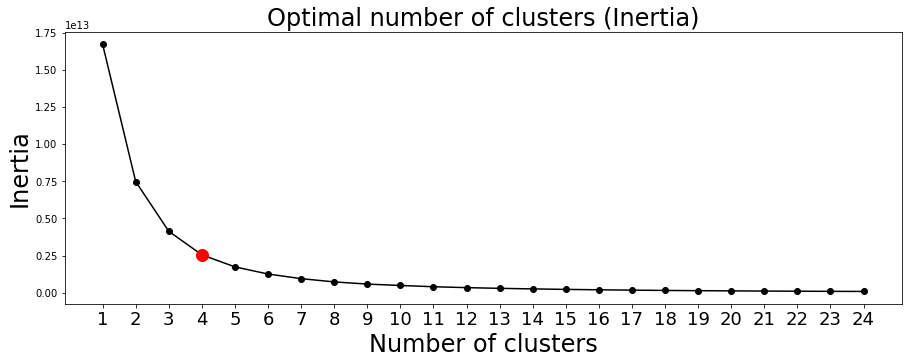

In [9]:
# Plot number of clusters vs inertia
plt.figure(figsize = (15, 5))                                       #Figure size length 15 and height 5 
plt.plot(k, inertias, '-o', color = 'black')                        # X axis = k , Y axis = Inertia
plt.plot(4, inertias[3], '-o', color = 'red', markersize = 12)      # Red dot specifying optimal cluster
plt.xlabel('Number of clusters', fontsize = 24)                    
plt.ylabel('Inertia', fontsize = 24)
plt.title('Optimal number of clusters (Inertia)', fontsize = 24)
plt.xticks(k, fontsize = 18)
plt.yticks(fontsize = 10);

* Now here we can see that difference is quite stagnent from point 5 .. it is around 10,000 from point 5.
* So optimal number of cluster is 5, we can choose any number of cluster around 5 like 4,6,7 etc.
* We will calculate Silhouette Coefficient for better selection of optimal number of clusters.

<font size = '+2' color = 'Green'><b>Silhouette Coefficient</b></font>

Silhouette Coefficient is calculated using the mean intra-cluster distance `a` and the distance between a sample and the nearest cluster that the sample is not a part of `b`.  The Silhouette Coefficient for a sample is `(b - a) / max(a,b)`

The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.


Note:
* kmeans.labels_  =  array of assignements of different clusters for ex; if first point is in cluster number 2 and 2nd point in cluster 5 then it will look like [2,5]
* We will calculate Silhouette Coefficient for different number of clusters for example for k=2 there will be two clusters and we will find coefficient for it... then for k=3, 4, 5,....etc

In [10]:
# Number of clusters
ks = range(2, 24)
score = []

# Silhouette Method
for k in ks:
    kmeans = KMeans(n_clusters = k, init='k-means++', random_state = 555).fit(train_data)
    ss = metrics.silhouette_score(train_data, kmeans.labels_, sample_size = 10000)
    score.append(ss)
    print('Silhouette Score for %i Clusters: %0.4f' % (k, ss))

Silhouette Score for 2 Clusters: 0.7416
Silhouette Score for 3 Clusters: 0.6587
Silhouette Score for 4 Clusters: 0.6136
Silhouette Score for 5 Clusters: 0.5919
Silhouette Score for 6 Clusters: 0.5833
Silhouette Score for 7 Clusters: 0.5709
Silhouette Score for 8 Clusters: 0.5708
Silhouette Score for 9 Clusters: 0.5589
Silhouette Score for 10 Clusters: 0.5618
Silhouette Score for 11 Clusters: 0.5516
Silhouette Score for 12 Clusters: 0.5575
Silhouette Score for 13 Clusters: 0.5487
Silhouette Score for 14 Clusters: 0.5470
Silhouette Score for 15 Clusters: 0.5516
Silhouette Score for 16 Clusters: 0.5452
Silhouette Score for 17 Clusters: 0.5430
Silhouette Score for 18 Clusters: 0.5425
Silhouette Score for 19 Clusters: 0.5397
Silhouette Score for 20 Clusters: 0.5465
Silhouette Score for 21 Clusters: 0.5366
Silhouette Score for 22 Clusters: 0.5441
Silhouette Score for 23 Clusters: 0.5391


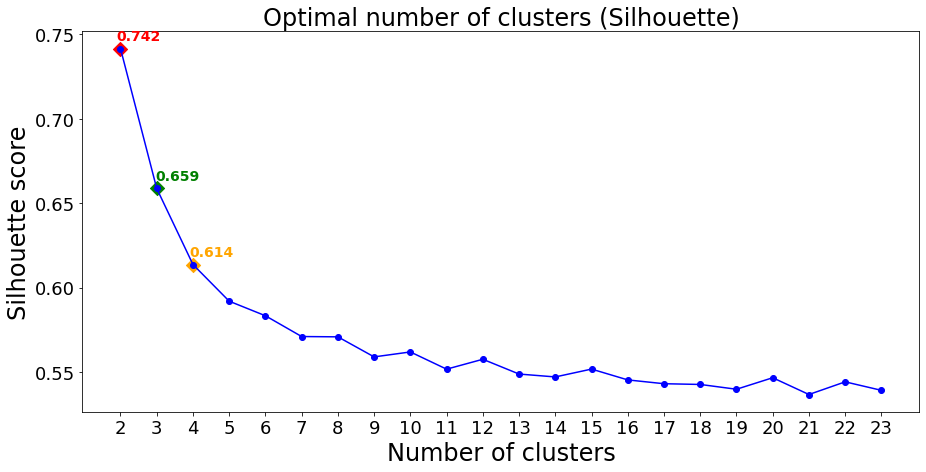

In [11]:
# Graph
plt.figure(figsize = (15, 7))
plt.plot(ks, score, '-o', color = 'blue')

# Marking Points
s = ['D', 'D', 'D' ]
col = ['red','green','orange' ]
x = np.array([2, 3, 4])       ### Basically we are creating points for ex; (x,y) = (2.4 , 6)
y = score[0:3]                   ### value of score from first element to 3rd element
plt.xticks(ks, fontsize = 18)
plt.yticks(fontsize = 18)

## Different Markers for first three points
for _s, c, _x, _y in zip(s, col, x, y):
    plt.scatter(_x, _y, marker=_s, c=c, s = 100)
plt.xlabel("Number of clusters", fontsize = 24)
plt.ylabel("Silhouette score", fontsize = 24)
plt.title('Optimal number of clusters (Silhouette)', fontsize = 24)

plt.text(1.90, score[0] + 0.005, str(round(score[0], 3)), size = 14, color = 'red', weight = 'semibold')

plt.text(2.97, score[1] + 0.005, str(round(score[1], 3)), size = 14, color = 'green', weight = 'semibold')

plt.text(3.90, score[2] + 0.005, str(round(score[2], 3)), size = 14, color = 'orange', weight = 'semibold')



plt.show()

* We can see that the Silhouette scores remains same after number of cluster = 4 , and it is maximum for k=2 but logically it is not possible to have only two clusters ( any set of datapoints can have two clusters we can draw boundaries randomly to have two clusters right??). 

* So there is a higher chance that optimal number of clusters are 3 or 4

<font size = '+5' color = 'blue'><b>Train Data</b></font>

In [12]:
# Lets say for number of cluster = 2, it means that it can be "Human" or it can be "Hacker"

kmeans = KMeans(n_clusters = 4,init= 'k-means++',max_iter = 300, random_state=1).fit(train_data)
labels = kmeans.labels_   # it will be series containing 0 and 1 (0 for human and 1 for hacker)


df_x_train = pd.DataFrame(train_data)
df_x_train['Clusters'] = pd.Series(labels, index=df_x_train.index)  # Adding Column named Clusters containing 0 and 1

cluster_names = {0:'Beginner',1:'Professionals',2:'Hacker',3:'Experienced'}

df_x_train['Name_of_Cluster'] = df_x_train['Clusters'].map(cluster_names)  # adding one more Column which tells 0 as human and 1 as hacker
df_x_train.columns = ['KillDeathRatio', "HeadshotKillRatio", 'WinRatio' , "Top10Ratio",'DamageDealt','RoundsPlayed','Cluster','Name_of_Cluster']

df_x_train.head()

,KillDeathRatio,HeadshotKillRatio,WinRatio,Top10Ratio,DamageDealt,RoundsPlayed,Cluster,Name_of_Cluster
65742,2.36,0.20,3.85,19.2,6776.55,26,0,Beginner
61579,1.20,0.33,0.00,10.0,1170.55,10,0,Beginner
70843,2.10,0.27,2.33,4.7,9352.01,43,0,Beginner
9744,1.00,0.19,2.10,18.2,16784.37,143,3,Experienced
12881,2.46,0.14,13.79,48.3,14725.47,58,3,Experienced


<font size = '+5' color = 'blue'><b>Note</b></font>
1. How can I assign { 0:'Beginner',1:'Professionals',2:'Hacker',3:'Experienced'} in the early stages?? No I can not...

* I have to first check and then count the numbers like by the next cell " df_x_train.groupby('Name_of_Cluster').count() "  (Scroll down to see it) and then make an intelligent guess that there must be small mount of hackers and many begiiners etc. acoording to game popularity and other information.

* One can also used Scaled data but to get better intuition we are not using scaled data.

* (Scroll down to see plot) Althogh we are plotting 3D graph and by viewing it,one might get confused because 'Hacker' might have high HeadShotRatio and Higher WinRatio right?? so one logic is that it should be located on the top edges of axis Y and Z but in the graph its not like that why???  
* Because we are considering only 3 features only RoundsPlayed HeadshotkillRatio and WinRatio but in actual model is considering other features like damagedelt and top10 ratio etc the all 6 Features.

* So we can not visualize more than 3D. Actually it is 6D from our features and that is why we are feeling that way that model is wrong or something...

In [13]:
df_x_train.groupby('Name_of_Cluster').count()

,KillDeathRatio,HeadshotKillRatio,WinRatio,Top10Ratio,DamageDealt,RoundsPlayed,Cluster
Name_of_Cluster,,,,,,,
Beginner,45690,45690,45690,45690,45690,45690,45690
Experienced,19740,19740,19740,19740,19740,19740,19740
Hacker,516,516,516,516,516,516,516
Professionals,4372,4372,4372,4372,4372,4372,4372


<font size = '+5' color = 'blue'><b>Plot of Selected features of Train data</b></font>

In [14]:
def scat3d(df,x,y,z,code,title):
    scatter = px.scatter_3d(df,x=x,y=y,z=z,color=code,title = title)
    return scatter.show()

# Plot of Win Ratio, Kill Death Ratio, Headshott KIll Ratio
scat3d(df = df_x_train , x = 'RoundsPlayed' , y = 'HeadshotKillRatio' , z = 'WinRatio',code = 'Name_of_Cluster' , title = 'roundsplayed vs Headshot vs Win ratio')

<font size = '+5' color = 'blue'><b>Developer Data Prediction</b></font>

In [15]:
predict_labels = kmeans.predict(dev_data)

In [16]:
dev_df = pd.DataFrame(dev_data)
dev_df['Cluster'] = pd.Series(predict_labels,index = dev_df.index)
dev_df['Name_of_Cluster'] = dev_df['Cluster'].map(cluster_names)
dev_df.groupby('Name_of_Cluster').count()

,solo_KillDeathRatio,solo_HeadshotKillRatio,solo_WinRatio,solo_Top10Ratio,solo_DamageDealt,solo_RoundsPlayed,Cluster
Name_of_Cluster,,,,,,,
Beginner,9136,9136,9136,9136,9136,9136,9136
Experienced,3915,3915,3915,3915,3915,3915,3915
Hacker,99,99,99,99,99,99,99
Professionals,914,914,914,914,914,914,914


<font size = '+5' color = 'blue'><b>Test Data Prediction</b></font>

In [17]:
predict_test_labels = kmeans.predict(test_data)

In [18]:
df_test = pd.DataFrame(test_data)
df_test['Cluster'] = pd.Series(predict_test_labels, index = df_test.index)
df_test['Name_of_Cluster'] = df_test['Cluster'].map(cluster_names)
df_test.columns = ['KillDeathRatio', "HeadshotKillRatio", 'WinRatio' , "Top10Ratio",'DamageDealt','RoundsPlayed','Cluster','Name_of_Cluster']
df_test.groupby('Name_of_Cluster').count()

,KillDeathRatio,HeadshotKillRatio,WinRatio,Top10Ratio,DamageDealt,RoundsPlayed,Cluster
Name_of_Cluster,,,,,,,
Beginner,2280,2280,2280,2280,2280,2280,2280
Experienced,998,998,998,998,998,998,998
Hacker,28,28,28,28,28,28,28
Professionals,210,210,210,210,210,210,210


In [19]:
# 2D Scatter plot

px.scatter(df_test,y='DamageDealt',x = 'WinRatio',color = 'Name_of_Cluster', title = 'DamageDealt vs WinRatio')

# There can be many combinations but I am not plottting each and every combination

<font size = '+2' color = 'blue'><b>Remarks</b></font>

* PCA will help to know how the clusters are formed and without external labels we can not verify accuracy of our model.

<font size = '+2' color = 'blue'><b>Reference</b></font>

https://github.com/SulmanK/PUBG-clustering-player-behavior-for-cheaters